# Bootstrap Aplicado a datos

- Autor: Francine Palacios
- Ramo: Topicos Avanzados
- Profesor: Ronny Vallejos
- Descripcion: Este cuaderno Jupyter está dedicado al análisis exhaustivo de los parámetros obtenidos de un modelo de **regresión**. Se emplea el método de remuestreo Bootstrap para estimar la precisión y la confiabilidad de los parámetros estimados. El conjunto de datos utilizado proviene de registros de admisión a programas de posgrado, el cual está disponible para el público por la plataforma [kaggle](https://www.kaggle.com/) 

## Paquetes usados

In [18]:
import numpy as np 
import pandas as pd 
from scipy.stats import bootstrap
import seaborn as sns
import matplotlib.pyplot as plt 

## Datos para ejemplo simple

Utilizaremos como inicio para un ejemplo simple, los datos desde una normal.

In [ ]:
rng = np.random.default_rng()
from scipy.stats import norm
dist = norm(loc=2, scale=4)  # Nuestra distribucion desconocida
data = dist.rvs(size=100, random_state=rng)

## Ejemplo concreto de utilizacion de funciones

Para este ejemplo concreto/simple, nuestra estadisitca objetivo sera la desviacion estandar muestral sesgada.

### Configuraciones y observaciones iniciales

In [4]:
std_true = dist.std()      # Valor verdadero de la estadistica
print(std_true)

4.0


In [5]:
std_sample = np.std(data)  # La estadistica del muestreo de datos
print(std_sample)

3.537345685586647


In [8]:
data_1 = (data,)  # El muestreo debe ser una secuencia


In [20]:
data_1

(array([ 2.66158388,  3.60839037, -5.79759319, -1.42828919,  3.12356766,
         1.99157819,  0.11861192,  0.96349433,  2.44395684,  4.62512567,
         1.2755367 ,  3.81865219,  6.81767521, -2.87112871, -1.08227478,
         1.93974131,  5.78971283,  2.28672153,  2.93203781,  3.32836406,
        -1.68439149,  2.28025665, -3.84645257,  1.30015618,  4.84662668,
         1.74893548,  0.31134289, -0.97188666, -1.30653192,  2.33089568,
        -9.52336921,  2.3793622 ,  7.30467515,  2.77705453, 11.77506814,
         4.09221467,  8.57315171,  1.87010314,  4.76448081, -0.34757938,
        -0.95117584,  1.25883097, -3.63834547, -2.69811741,  0.38635241,
        -2.2872142 ,  4.65705329,  1.81296026,  1.05958289, -0.36769427,
         3.65319323,  2.26266581, -1.43954743, -0.79073778,  1.38493624,
         2.07473377, -1.16223915,  0.19559999,  4.25908587,  2.66079818,
         2.04750236,  1.06379573,  4.28400907,  2.95889827,  1.81959525,
         4.5758922 ,  5.28716992, -1.71678699, -0.2

### Utilizacion de Bootstrap 

In [10]:
res = bootstrap(data_1, np.std, confidence_level=0.9,
                random_state=rng)

In [22]:
res.bootstrap_distribution


array([2.86783372, 3.83475884, 3.21870015, ..., 3.39241779, 3.7876024 ,
       3.36990535])

In [23]:
res.bootstrap_distribution.mean()

3.5094942519008816

In [24]:
res.standard_error   #Que es equivalente a res.boostrap_distribution.std()

0.3054690295827294

[]

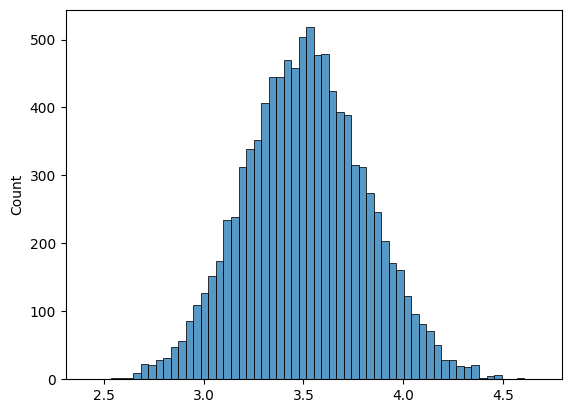

In [19]:
sns.histplot(res.bootstrap_distribution)
plt.plot()

Como veremos a continuacion, esta distribucion se asemeja mucho a una normal.

In [223]:
! pip install statsmodels.pip

ERROR: Could not find a version that satisfies the requirement statsmodels.pip (from versions: none)
ERROR: No matching distribution found for statsmodels.pip


   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 960.0 kB/s eta 0:00:11
   - -------------------------------------- 0.4/9.9 MB 5.3 MB/s eta 0:00:02
   --- ------------------------------------ 0.9/9.9 MB 7.0 MB/s eta 0:00:02
   ----- ---------------------------------- 1.4/9.9 MB 8.2 MB/s eta 0:00:02
   ------- -------------------------------- 1.8/9.9 MB 8.4 MB/s eta 0:00:01
   ---------- ----------------------------- 2.5/9.9 MB 9.2 MB/s eta 0:00:01
   ------------ --------------------------- 3.0/9.9 MB 9.5 MB/s eta 0:00:01
   ------------- -------------------------- 3.4/9.9 MB 9.4 MB/s eta 0:00:01
   --------------- ------------------------ 3.9/9.9 MB 9.6 MB/s eta 0:00:01
   ------------------ --------------------- 4.5/9.9 MB 9.9 MB/s eta 0:00:01
   -------------------- ------------------- 5.0/9.9 MB 10.1 MB/s eta 0:00:01
   ---------------------- ----------------- 5.6/9.9 MB 10.2 MB/s eta 0:00:01
   ------------

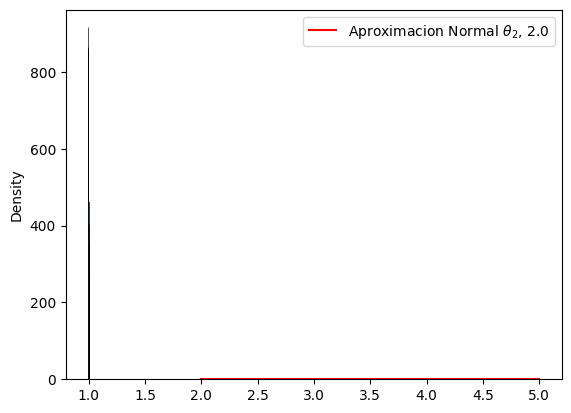

In [219]:
sns.histplot(res.bootstrap_distribution, stat='density')
x=np.linspace(2,5,100)
pdf= norm.pdf(x, loc=std_sample, scale=res.standard_error)
plt.plot(x,pdf, label=rf"Aproximacion Normal $\theta_2$, {x[0]}", c="r")
plt.legend()
plt.show()



Por lo que es intuitivo construir un intervalo de confianza basado en la normal anterior. A continuacion se entrega un intervalo basado en normalidad con el 90% de confianza

In [48]:
norm.interval(0.9, loc=std_sample, scale=res.standard_error)

(3.034893844356148, 4.039797526817146)

Debido al teorema del límite central, esta aproximación normal es precisa para una variedad de estadísticas y distribuciones subyacentes a las muestras; sin embargo, la aproximación no es confiable en todos los casos. Debido a que el bootstrap está diseñado para trabajar con distribuciones y estadísticas subyacentes arbitrarias, utiliza técnicas más avanzadas para generar un intervalo de confianza preciso.

In [49]:
res.confidence_interval


ConfidenceInterval(low=3.1123580949521323, high=4.1480728465227825)

Si tomamos muestras de la distribución original 1000 veces y formamos un intervalo de confianza bootstrap para cada muestra, el intervalo de confianza contiene el valor verdadero de la estadística aproximadamente el 90% de las veces.

In [53]:
n_trials = 1000
ci_contains_true_std = 0
for i in range(n_trials):
   data = (dist.rvs(size=100, random_state=rng),)
   ci = bootstrap(data, np.std, confidence_level=0.9, n_resamples=1000,
                  random_state=rng).confidence_interval
   if ci[0] < std_true < ci[1]:
       ci_contains_true_std += 1

In [52]:
ci_contains_true_std

884

En lugar de escribir un bucle, también podemos determinar los intervalos de confianza para las 1000 muestras de una sola vez.

In [54]:
data = (dist.rvs(size=(n_trials, 100), random_state=rng),)
res = bootstrap(data, np.std, axis=-1, confidence_level=0.9,
                n_resamples=1000, random_state=rng)
ci_l, ci_u = res.confidence_interval

Aquí, ci_l y ci_u contienen el intervalo de confianza para cada una de las n_trials = 1000 muestras. Y de nuevo, aproximadamente el 90% contiene el valor verdadero, std_true = 4.


In [55]:
np.sum((ci_l < std_true) & (std_true < ci_u))

903

El método bootstrap también puede utilizarse para estimar intervalos de confianza de estadísticas de múltiples muestras, incluyendo aquellas calculadas por pruebas de hipótesis. scipy.stats.mood realiza la prueba de Mood para parámetros de escala iguales y devuelve dos resultados: una estadística y un valor p. 

Mas especificamente, la función scipy.stats.mood es una prueba estadística no paramétrica que se utiliza para probar la hipótesis nula de que dos muestras provienen de distribuciones con el mismo parámetro de escala. Esta funcion tiene como retorno:

- statistic: El z-score de la prueba de hipótesis.
- pvalue: El valor p de la prueba de hipótesis.

Para obtener un intervalo de confianza para la estadística de prueba, primero envolvemos scipy.stats.mood en una función que acepta dos argumentos de muestra, acepta un argumento de palabra clave axis y devuelve solo la estadística.

In [57]:
from scipy.stats import mood
def my_statistic(sample1, sample2, axis):
    statistic, _ = mood(sample1, sample2, axis=-1)
    return statistic

Aquí, utilizamos el método de ‘percentil’ con el nivel de confianza predeterminado del 95%.


In [58]:
sample1 = norm.rvs(scale=1, size=100, random_state=rng)
sample2 = norm.rvs(scale=2, size=100, random_state=rng)
data = (sample1, sample2)
res = bootstrap(data, my_statistic, method='basic', random_state=rng)

In [59]:
mood(sample1, sample2)[0]  # El elemento 0 es la estadistica

-4.9067275951586815

In [60]:
res.confidence_interval

ConfidenceInterval(low=-6.7454581060011165, high=-3.2948938316982446)

Ademas la estimacion de bootstrap de la desviacion estandar 

In [61]:
res.standard_error

0.8783545965421594

Las estadísticas de muestras apareadas también funcionan. Por ejemplo, considera el coeficiente de correlación de Pearson.

In [63]:
from scipy.stats import pearsonr
n = 100
x = np.linspace(0, 10, n)
y = x + rng.uniform(size=n)

In [66]:
pearsonr(x, y)[0]  # element 0 is the statistic


0.9957654214902854

Ajustamos pearsonr para que devuelva solo la estadística.

In [67]:
def my_statistic(x, y):
    return pearsonr(x, y)[0]

Llamamos a bootstrap utilizando paired=True. Además, dado que my_statistic no está vectorizada para calcular la estadística a lo largo de un eje dado, pasamos vectorized=False.

Las muestras apareadas se refieren a situaciones en las que los datos vienen en pares que están de alguna manera relacionados o emparejados. Esto suele ocurrir cuando se mide la misma muestra bajo dos condiciones diferentes o en dos momentos diferentes. Por ejemplo, si mides el peso de un grupo de personas antes y después de un programa de dieta, cada medida antes y después para una persona forma un par de datos123.

El uso de paired=True en la función bootstrap indica que los datos en las muestras x e y están emparejados de esta manera y que cualquier inferencia estadística debe tener en cuenta este emparejamiento. Esto es importante porque el análisis estadístico de muestras apareadas difiere del análisis de muestras independientes, ya que las muestras apareadas suelen estar correlacionadas.

En cuanto al término vectorizado, en el contexto de la programación y el análisis de datos, una función vectorizada es aquella que está diseñada para operar sobre arrays o vectores de datos de manera eficiente, aplicando la misma operación a cada elemento del vector sin necesidad de escribir un bucle explícito. Por ejemplo, muchas funciones en bibliotecas como NumPy o pandas están vectorizadas y pueden procesar rápidamente grandes conjuntos de datos45.

Cuando se dice que una función no está vectorizada, como en el caso de my_statistic, significa que la función no está diseñada para operar automáticamente sobre vectores de datos. En su lugar, procesa un solo par de datos a la vez. Por lo tanto, al pasar vectorized=False, le estás diciendo a la función bootstrap que debe llamar a my_statistic para cada par de datos individualmente, en lugar de intentar pasar todos los datos a la vez.

In [68]:
res = bootstrap((x, y), my_statistic, vectorized=False, paired=True,
                random_state=rng)

In [69]:
res.confidence_interval

ConfidenceInterval(low=0.9944082510394884, high=0.9967743727341034)

El objeto resultante (res) se puede volver a pasar al arranque (es decir a bootstrap) para realizar un remuestreo adicional.

Este concepto se refiere a la posibilidad de tomar un resultado previo de un proceso de bootstrap y usarlo para hacer más remuestreos. En el contexto del codigo mas adelante,  'res' es un objeto que contiene los resultados de un análisis de bootstrap previo. Al pasar este objeto de vuelta a la función bootstrap, podemos agregar más remuestreos a la distribución existente. Por ejemplo, si inicialmente hicimos 9999 remuestreos (n_resamples por defecto) y luego agregamos 1001  más (n_resamples), tendremos un total de 11000 remuestreos en tu distribución de bootstrap.

In [70]:
len(res.bootstrap_distribution)

9999

In [71]:
res = bootstrap((x, y), my_statistic, vectorized=False, paired=True,
                n_resamples=1001, random_state=rng,
                bootstrap_result=res)

In [72]:
len(res.bootstrap_distribution)

11000

Ademas para un remuestro adicional, podemos utilizarlo para cambiar las opciones del intervalo de confianza

Especificamente ek fragmento de código siguiente muestra cómo podemos modificar las opciones del intervalo de confianza para un análisis de bootstrap existente. Aquí, res2 es un nuevo objeto de resultado creado a partir del objeto de resultado original res. Se especifica que no se agreguen remuestreos adicionales (n_resamples=0), pero se cambia el método para calcular el intervalo de confianza a ‘percentile’ y se ajusta el nivel de confianza al 90% (confidence_level=0.9). 

In [73]:
res2 = bootstrap((x, y), my_statistic, vectorized=False, paired=True,
                 n_resamples=0, random_state=rng, bootstrap_result=res,
                 method='percentile', confidence_level=0.9)

La función np.testing.assert_equal se utiliza para asegurar que la distribución de bootstrap no ha cambiado a pesar de la modificación de las opciones del intervalo de confianza.

In [74]:
np.testing.assert_equal(res2.bootstrap_distribution,
                        res.bootstrap_distribution)

In [75]:
res.confidence_interval

ConfidenceInterval(low=0.994411761235454, high=0.9967683108361037)

In [76]:
res2.confidence_interval

ConfidenceInterval(low=0.9947213762553994, high=0.9966651514732371)

Tambien podemos usar multiples estadisticas

In [116]:
from scipy.stats import bootstrap, norm

media = 40
desviacion_estandar = 1

muestra_normal = norm.rvs(loc=media, scale=desviacion_estandar, size=1000)


In [117]:
def estadistica(datos):
    return np.mean(datos), np.std(datos)

In [118]:
resultado_bootstrap = bootstrap((muestra_normal,), estadistica, n_resamples=10000, method='percentile', confidence_level=0.95)

In [130]:
intervalos_confianza = [(resultado_bootstrap.confidence_interval[0][i], resultado_bootstrap.confidence_interval[1][i]) for i in range(len(resultado_bootstrap.confidence_interval[0]))]

# Asignamos cada intervalo a su respectiva estadística
intervalo_confianza_media, intervalo_confianza_desviacion = intervalos_confianza

In [123]:
resultado_bootstrap.confidence_interval

ConfidenceInterval(low=array([39.9553308 ,  0.97979491]), high=array([40.08281364,  1.07265235]))

In [129]:
print("Intervalo de confianza para la media:", intervalo_confianza_media)
print("Distancia para la media:", intervalo_confianza_media[1] - intervalo_confianza_media[0])

print("Intervalo de confianza para la desviación estándar:", intervalo_confianza_desviacion)
print("Distancia para la desviación estándar:", intervalo_confianza_desviacion[1] - intervalo_confianza_desviacion[0])

Intervalo de confianza para la media: (39.955330802073924, 40.08281364356553)
Distancia para la media: 0.12748284149160583
Intervalo de confianza para la desviación estándar: (0.9797949083809354, 1.0726523505838035)
Distancia para la desviación estándar: 0.09285744220286807


### Intervalos de Confianza

Ahora hablemos de los intervalos de Confianza para la tecnica de Bootstrap

#### Resumen de uso 

En la biblioteca scipy.stats.bootstrap, hay varios métodos para calcular estos intervalos:

- Percentil: Este método utiliza los percentiles de la distribución de remuestreo para definir el intervalo de confianza. Por ejemplo, para un intervalo de confianza del 95%, se usarían los percentiles 2.5 y 97.5.
- BCa (Bias-Corrected and Accelerated): Este método ajusta el intervalo de confianza para corregir el sesgo y la aceleración en la distribución de remuestreo. Es más complejo que el método del percentil y generalmente proporciona mejores resultados cuando la distribución del estimador no es simétrica.
- Básico (Reverse Percentile): Similar al método del percentil, pero invierte los roles de los percentiles. Por ejemplo, si normalmente tomaríamos los percentiles 2.5 y 97.5, aquí tomaríamos los percentiles 97.5 y 2.5 de la distribución de remuestreo.

Respecto al intervalo normal no esta implementado, pero podemos implementarlo de manera sencilla como se vio anteriormente.

En general, se tiene las siguientes indicaciones: 

- Percentil: Este método es simple y directo, y es útil cuando tienes una muestra grande y la distribución del estimador es aproximadamente simétrica. No ajusta por sesgo ni por la forma de la distribución de remuestreo.
- BCa (Bias-Corrected and Accelerated): Es preferible cuando la distribución del estimador no es simétrica. También es útil cuando se sospecha que hay sesgo en los estimadores o cuando la distribución tiene colas pesadas. Es un método más robusto que el del percentil.
- Básico (Reverse Percentil): Este método puede ser útil cuando el método del percentil no es adecuado debido a la asimetría en la distribución de remuestreo. Es una alternativa al método del percentil que puede ofrecer una mejor cobertura del intervalo de confianza en ciertas situaciones.

En general, el método BCa suele ser la opción más segura y robusta, especialmente en muestras pequeñas o cuando la distribución del estimador es desconocida o complicada. Sin embargo, requiere más cálculos que el método del percentil. El método básico es menos común pero puede ser útil en casos específicos donde los otros métodos no funcionan bien.

Especificamente se tiene las siguientes construcciones

#### Construccion

Se construye un intervalo de confianza bilateral, con nivel de confianza $1-\alpha$, para un parámetro $\theta$ de la distribución $F$.
Una vez elegido el método bootstrap adecuado, teniendo en cuenta la información disponible en el contexto del que se trate, otro aspecto importante es el método para la construcción del intervalo de confianza bootstrap de forma que la probabilidad de cobertura sea lo más parecida posible al nivel nominal $1-\alpha$.

Para un tratamiento más detallado, incluyendo los órdenes de los errores de cobertura, ver por ejemplo el [Capítulo 4](https://rubenfcasal.github.io/book_remuestreo/icboot.html) de Cao y Fernández-Casal (2021) o el Capítulo 5 de Davison y Hinkley (1997).



##### Aproximación normal 


        

Este método emplea las aproximaciones bootstrap del sesgo $Sesgo^{\ast}\left( \hat{\theta}^{\ast} \right)$ y de la varianza $Var^{\ast}\left( \hat{\theta}^{\ast} \right)$, y asume que la distribución del correspondiente estadístico studentizado es una normal estándar
$$\frac{\hat{\theta} - Sesgo^{\ast}\left( \hat{\theta}^{\ast} \right) - \theta}{\sqrt{Var^{\ast}\left( \hat{\theta}^{\ast} \right)}} \underset{aprox}{\sim }\mathcal{N}\left( 0, 1 \right).$$
De esta forma se obtiene la estimación por intervalo de confianza:
$$\hat{I}_{norm}=\left( \hat{\theta} - Sesgo^{\ast}\left( \hat{\theta}^{\ast} \right) - z_{1-\alpha /2}\sqrt{Var^{\ast}\left( \hat{\theta}^{\ast} \right)},\hat{\theta} - Sesgo^{\ast}\left( \hat{\theta}^{\ast} \right) + z_{1 - \alpha /2}\sqrt{Var^{\ast}\left( \hat{\theta}^{\ast} \right)} \right).$$



##### Método percentil directo 



Este método se basa en la construcción del intervalo de confianza, mediante bootstrap, empleando como estadístico el estimador $$R = \hat{\theta}.$$

Una vez elegido el método de remuestreo, empleando un estimador, $\hat{F}\,$, de la
distribución poblacional, $F$, la distribución en el muestreo de $R = \hat{\theta}$ se aproxima directamente mediante la distribución bootstrap de $R^{\ast}= \hat{\theta}^{\ast}$.
A partir de las réplicas bootstrap del estimador aproximamos los cuantiles $x_{\alpha /2}$ y $x_{1-\alpha /2}$ (denotando por $x_{\beta }$ el valor verificando $P^{\ast}\left( R^{\ast }\leq x_{\beta } \right) =\beta$), de forma que 
$$\begin{aligned}
1-\alpha &= 1-\frac{\alpha }{2}-\frac{\alpha }{2}
= P^{\ast}\left( \hat{\theta}^{\ast}<x_{1-\alpha /2} \right) - P^{\ast}\left( \hat{\theta}^{\ast}\leq x_{\alpha /2} \right) \\
&= P^{\ast}\left( x_{\alpha /2}<\hat{\theta}^{\ast}<x_{1-\alpha /2} \right),
\end{aligned}$$
y asumimos que esto aproxima lo que ocurre con la distribución poblacional
$$P\left( x_{\alpha /2} < \hat{\theta} < x_{1-\alpha /2} \right) \approx 1-\alpha.$$
De donde se obtiene el intervalo de confianza bootstrap calculado 
por el método percentil directo
$$\hat{I}_{perc}=\left( x_{\alpha /2}, x_{1-\alpha /2}  \right).$$

Una ventaja de los intervalos construidos con este método es que son invariantes frente a transformaciones del estimador (en el caso de que fuese más adecuado trabajar en otra escala, no sería necesario conocer la transformación).
Sin embargo, la precisión puede verse seriamente afectada en el caso de estimadores sesgados.




##### Método percentil básico 



En este método se emplea como estadístico el estimador centrado (no estandarizado)
$$R = \hat{\theta}-\theta.$$
De forma análoga, la distribución en el muestreo de $R$ se aproxima mediante la distribución bootstrap de
$$R^{\ast}= \hat{\theta}^{\ast}-\theta \left( \hat{F} \right) = \hat{\theta}^{\ast}-\hat{\theta}.$$
A partir de las réplicas bootstrap del estadístico se aproximan los cuantiles $x_{\alpha /2}$ y $x_{1-\alpha /2}$ tales que
$$1-\alpha = P^{\ast}\left( x_{\alpha /2}<R^{\ast}<x_{1-\alpha /2} \right),$$
tomándolo como aproximación de lo que ocurre con la distribución poblacional
$$\begin{aligned}
1-\alpha &\approx P\left( x_{\alpha /2}<R<x_{1-\alpha /2} \right) \\
&= P\left( x_{\alpha /2} < \hat{\theta}-\theta < x_{1-\alpha /2} \right) \\
&= P\left( \hat{\theta} - x_{1-\alpha /2} < \theta <\hat{\theta} -x_{\alpha /2} \right).
\end{aligned}$$
De donde se obtiene el intervalo de confianza bootstrap calculado 
por el método percentil básico
$$\hat{I}_{basic}=\left( \hat{\theta} - x_{1-\alpha /2},\hat{\theta} - x_{\alpha /2} \right).$$



##### Método BCa 



El método $BCa$ (bias-corrected and accelerated) propuesto por Efron (1987) considera una transformación de forma que la distribución se aproxime a la normalidad, construye el intervalo en esa escala asumiendo normalidad y transforma el resultado a la escala original empleando la distribución bootstrap.
El intervalo obtenido es de la forma:
$$\hat{I}_{perc}=\left( x_{\alpha /2}, x_{1-\alpha /2}  \right),$$
donde        
$$x_u = \hat G^{-1}\left(\Phi\left(z + \frac{z + z_u}{1-a(z+z_u)}\right)  \right),$$
siendo $\hat G$ la distribución empírica de $\hat{\theta}^{\ast}$, $\Phi(z)$ la función de distribución de la normal estándar, $z_u = \Phi^{-1}(u)$ el correspondiente cuantil y:

- $z = \Phi^{-1}(\hat G(\hat\theta))$ un factor de corrección de sesgo.
- $a$ la denominada constante aceleradora (o corrección de asimetría), que suele ser aproximada mediante jackknife.

Para más detalles ver Sección 5.3.2 de Davison y Hinkley (1997).


#### Ejemplo

Veamos un ejemplo, donde tomamos una disitribucion normal y la contaminamos

In [1]:
from scipy.stats import bootstrap, norm

media = 0
desviacion_estandar = 1

muestra_normal = norm.rvs(loc=media, scale=desviacion_estandar, size=1000)

# Añadimos datos atípicos extremos:
datos_atipicos = [media + 40*desviacion_estandar]*100  # 100 datos atípicos
muestra_normal_con_atipicos = np.append(muestra_normal, datos_atipicos)


NameError: name 'np' is not defined

In [96]:
def media(datos):
    return np.mean(datos)

In [97]:

resultado_bootstrap = bootstrap((muestra_normal_con_atipicos,), media, n_resamples=10000, method='percentile', confidence_level=0.95)

# Reutilizamos el resultado del remuestreo para calcular los intervalos de confianza con diferentes métodos
resultado_percentil = bootstrap((muestra_normal_con_atipicos,), media, bootstrap_result=resultado_bootstrap, n_resamples=0, method='percentile')
resultado_bca = bootstrap((muestra_normal_con_atipicos,), media, bootstrap_result=resultado_bootstrap, n_resamples=0, method='BCa')
resultado_basico = bootstrap((muestra_normal_con_atipicos,), media, bootstrap_result=resultado_bootstrap, n_resamples=0, method='basic')


In [98]:

print("Intervalo de confianza Percentil:", resultado_percentil.confidence_interval)
print("Distancia Percentil:", resultado_percentil.confidence_interval[1] - resultado_percentil.confidence_interval[0])

print("Intervalo de confianza BCa:", resultado_bca.confidence_interval)
print("Distancia BCa:", resultado_bca.confidence_interval[1] - resultado_bca.confidence_interval[0])

print("Intervalo de confianza Básico:", resultado_basico.confidence_interval)
print("Distancia Básico:", resultado_basico.confidence_interval[1] - resultado_basico.confidence_interval[0])


Intervalo de confianza Percentil: ConfidenceInterval(low=0.15376341460857085, high=0.6551803633882294)
Distancia Percentil: 0.5014169487796585
Intervalo de confianza BCa: ConfidenceInterval(low=0.17832684399298268, high=0.7023764920828205)
Distancia BCa: 0.5240496480898378
Intervalo de confianza Básico: ConfidenceInterval(low=0.1195328931034898, high=0.6209498418831483)
Distancia Básico: 0.5014169487796585


## Implimentacion usando los datos objetivo

La introduccion de los datos ya se hizo en Jackknife

In [132]:
path=r'C:\Users\Francine Palacios\Desktop\Topicos Avanzados\Resampling\Data\Admission_Predict_Ver1.1.csv'
df_data= pd.read_csv(path)
df_data = df_data.drop(columns=['Serial No.'])
df_data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [184]:
df_data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [188]:
columnas=['GRE Score', 'TOEFL Score', 'University Rating', 'Chance of Admit ']

In [189]:
tupla_arrays = tuple(df_data[col].to_numpy() for col in columnas)

In [198]:
def estadistica_interes(*args):
    # tupla_arrays = (args)
    df = pd.DataFrame(args).transpose()
    X=df[df.columns[:-1]]
    y=df[df.columns[-1]]
    # print(y)
    X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
    
    clf = LinearRegression(
    fit_intercept=True,    # Incluir el término de sesgo (intercept)
    )
    clf.fit( X_train,y_train)
    return np.append(clf.intercept_,clf.coef_)

In [208]:
estadistica_interes(*tupla_arrays)


array([-1.92541066,  0.00591126,  0.00653695,  0.02431605])

In [199]:
resultado_boots= bootstrap(tupla_arrays, estadistica_interes, vectorized=False, paired=True,
                n_resamples=9999, method='percentile', confidence_level=0.9)

In [217]:
type(resultado_boots.bootstrap_distribution[0])

numpy.ndarray

In [196]:
intervalos_confianza = [(resultado_boots.confidence_interval[0][i], resultado_boots.confidence_interval[1][i]) for i in range(len(resultado_boots.confidence_interval[0]))]

# Asignamos cada intervalo a su respectiva estadística
# intervalo_1, intervalo_2,intervalo_3, intervalo_4, intervalo_5, intervalo_6, intervalo_7, intervalo_8 = intervalos_confianza

In [211]:
df_intervalos = pd.DataFrame(intervalos_confianza, columns=["Lower", "Upper"])
df_intervalos['theta'] = [f'theta_{i}' for i in range(len(intervalos_confianza))]

df_intervalos['theta total datos'] = estadistica_interes(*tupla_arrays)

def esta_en_intervalo(row):
    return row['Lower'] <= row['theta total datos'] <= row['Upper']

df_intervalos['En Intervalo'] = df_intervalos.apply(esta_en_intervalo, axis=1)

df_intervalos = df_intervalos[['theta', 'theta total datos', 'Lower', 'Upper', 'En Intervalo']]

df_intervalos

,theta,theta total datos,Lower,Upper,En Intervalo
0,theta_0,-1.925411,-1.975885,-1.536867,True
1,theta_1,0.005911,0.004224,0.006204,True
2,theta_2,0.006537,0.005054,0.008627,True
3,theta_3,0.024316,0.021584,0.035737,True
